In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('data.csv')
df = df.drop(df.columns[0], axis=1)

# Define features and target
X = df.values[:, 1:6]
Y = df.values[:,0]

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split Data in Train and Test Data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=101)

D:\Programme\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Programme\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Logistic Regression

In [3]:
# Load Libary
from sklearn.linear_model import LogisticRegression

# Create new Logistic Regression
lr = LogisticRegression()

# Train the model
modelLr = lr.fit(X_train,y_train)

D:\Programme\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Random Forest

In [4]:
# Load Libary
from sklearn.ensemble import RandomForestClassifier

# Create new Random Forest Classifier
rf = RandomForestClassifier(random_state=0, n_jobs=-1)

# Train the model
modelRf = rf.fit(X_train, y_train)

D:\Programme\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### ROC

In [5]:
def calculateTpr (tp, tn, fn):
    if (tp == 0): return 0.0
    return tp/(tp+fn);

def calculateFpr (fp, fn, tn):
    if (fp == 0): return 0.0
    return fp/(fp+tn);

In [6]:
def calculateRates (rm):
    predict = rm.predict_proba(X_test)[:,1]

    # Create DataFrame
    dataframe = pd.DataFrame()
    dataframe['predict'] = predict
    dataframe['returnLabel'] = y_test

    # Sort the prediction column
    dataframe = dataframe.sort_values(by=['predict'], ascending=False)
    dataframe.head()

    tpr = []
    fpr = []
    threshold = 1.0

    while threshold > 0:
        fp = 0.0
        tp = 0.0

        tn = 0.0
        fn = 0.0

        for index, row in dataframe.iterrows():            
            if(row['predict'] >= threshold):
                if (row['returnLabel'] == 1):
                    tp = tp + 1
                else:
                    fp = fp + 1        
            else:
                if (row['returnLabel'] == 1):
                    fn = fn + 1 
                else:
                    tn = tn + 1

        tpr.append(calculateTpr(tp, tn, fn))
        fpr.append(calculateFpr(fp, fn, tn))

        threshold = threshold - 0.001

    tpr.append(1.0)
    fpr.append(1.0)
    return tpr,fpr

In [7]:
# For Logistic Regression
tplr, fplr = calculateRates(lr)

# For Random Forest
tprf, fprf = calculateRates(rf)

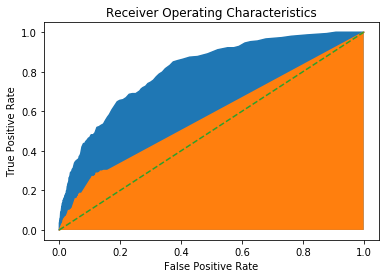

In [8]:
# Represent ROC curve in the diagram
plt.title("Receiver Operating Characteristics")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fplr, tplr)
plt.plot(fprf, tprf)
plt.plot([0, 1], ls="--")
plt.fill_between(fplr,tplr)
plt.fill_between(fprf, tprf)
plt.show()